In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
tic = time.perf_counter()
X,y = fetch_openml(data_id=41982,as_frame=False,return_X_y=True)
toc = time.perf_counter()

print('It took',(toc-tic)/60,' minutes to import the file.')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


It took 0.8044356602333332  minutes to import the file.


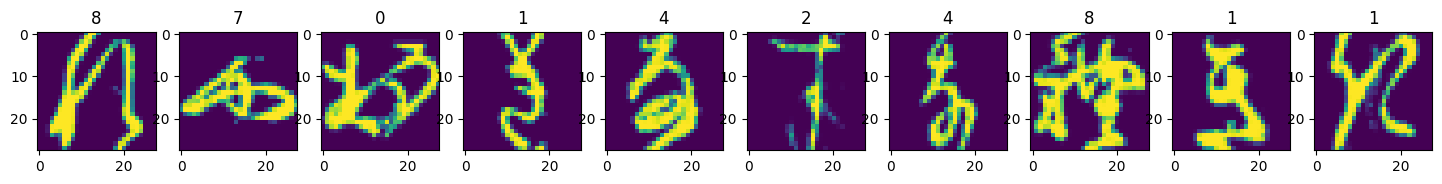

In [11]:
plt.figure(figsize=(18,9))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i].reshape(28,28))
    plt.title(y[i])
    
plt.show()

In [12]:
print(len(X))
print(len(y))

70000
70000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X_train.shape
y_train.shape
#nsamples, nx, ny, channel = X_train.shape
#d2_train_dataset = X_train.reshape((nsamples,nx*ny))

(52500,)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
from sklearn.model_selection import cross_val_score

tic = time.perf_counter()
#print(f"The CV scores are {cross_val_score(knn, X_train, y_train_2, cv=5, scoring='accuracy')}")
print(f"The CV scores are {cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')}")
toc = time.perf_counter()
print(f"The CV took {toc-tic} seconds. Yikes, better keep this in mind!")

The CV scores are [0.95771429 0.95657143 0.95847619 0.9547619  0.958     ]
The CV took 123.14632489799999 seconds. Yikes, better keep this in mind!


In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

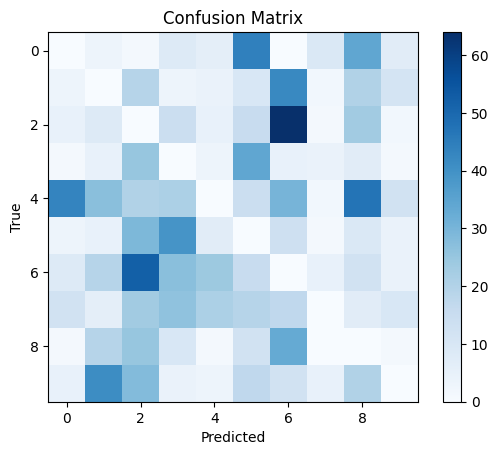

In [22]:
y_train_pred = knn.predict(X_train)
cm = confusion_matrix(y_train,y_train_pred)
np.fill_diagonal(cm, 0)
plt.imshow(cm,cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5238
           1       0.97      0.98      0.98      5212
           2       0.96      0.97      0.97      5260
           3       0.97      0.98      0.98      5232
           4       0.99      0.96      0.97      5234
           5       0.97      0.98      0.97      5321
           6       0.96      0.97      0.96      5304
           7       0.99      0.97      0.98      5200
           8       0.97      0.98      0.97      5279
           9       0.99      0.97      0.98      5220

    accuracy                           0.97     52500
   macro avg       0.98      0.97      0.97     52500
weighted avg       0.98      0.97      0.97     52500



In [25]:
# y_train_score = knn.predict_proba(X_train)
# fpr, tpr, threshold = roc_curve(y_train, y_train_score[:,1])
# roc_auc = roc_auc_score(y_train,y_train_score[:,1])
# plt.plot(fpr, tpr, label='ROC (AUC = %0.2f)' % roc_auc)
# plt.xlabel('False Positive Rate')
# plt.ylabel('False Negative Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

In [26]:
#precision, recall, thresholds = precision_recall_curve(y_train,y_train_score[:,1])
#plt.plot(recall,precision,label='Precision-Recall')
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.legend()
#plt.show()

Simple developed CRNN model

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, LSTM, TimeDistributed, Input, Reshape

# Load the data
X, y = fetch_openml(data_id=41982, as_frame=False, return_X_y=True)

# Convert data to float32 and normalize it between 0 and 1
X = X.astype('float32') / 255.

# Reshape the data to a 4D tensor
X = X.reshape(X.shape[0], 28, 28, 1)

# Convert labels to one-hot encoded vectors
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the model
inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)
dense1 = Dense(128, activation='relu')(flatten)
reshape = Reshape((1, 128))(dense1)
lstm = LSTM(32, return_sequences=False)(reshape)
output = Dense(10, activation='softmax')(lstm)

model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
1750/1750 [==============================] - 67s 37ms/step - loss: 0.3312 - accuracy: 0.9067 - val_loss: 0.1402 - val_accuracy: 0.9602
Epoch 2/10
1750/1750 [==============================] - 63s 36ms/step - loss: 0.0894 - accuracy: 0.9744 - val_loss: 0.1114 - val_accuracy: 0.9662
Epoch 3/10
1750/1750 [==============================] - 62s 36ms/step - loss: 0.0510 - accuracy: 0.9855 - val_loss: 0.0765 - val_accuracy: 0.9785
Epoch 4/10
1750/1750 [==============================] - 64s 36ms/step - loss: 0.0316 - accuracy: 0.9909 - val_loss: 0.0657 - val_accuracy: 0.9814
Epoch 5/10
1750/1750 [==============================] - 62s 35ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0863 - val_accuracy: 0.9769
Epoch 6/10
1750/1750 [==============================] - 63s 36ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0768 - val_accuracy: 0.9802
Epoch 7/10
1750/1750 [==============================] - 65s 37ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0829 -

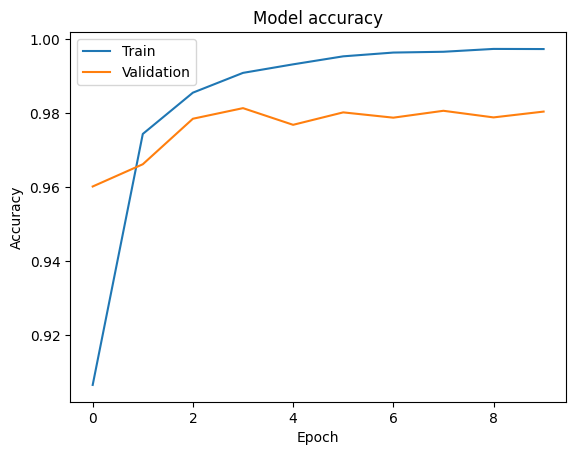

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

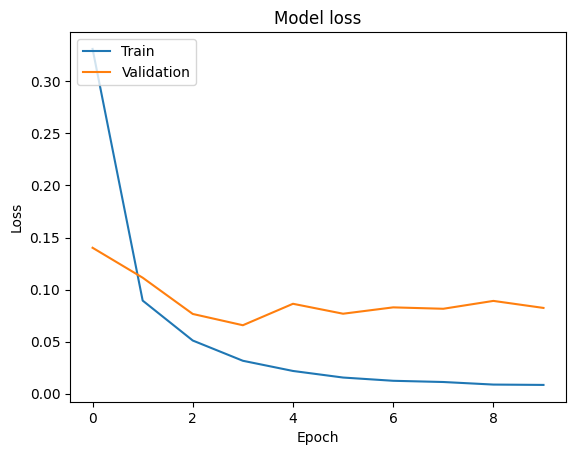

In [29]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and f1-score for each class
report = classification_report(y_test_classes, y_pred_classes, output_dict=True)

# Plot the precision, recall, and f1-score for each class
for class_name, metrics in report.items():
    if class_name.isdigit():
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        print(f"Class {class_name} - Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1_score:.3f}")


438/438 [==============================] - 5s 9ms/step
Class 0 - Precision: 0.985, Recall: 0.989, F1-score: 0.987
Class 1 - Precision: 0.984, Recall: 0.977, F1-score: 0.980
Class 2 - Precision: 0.970, Recall: 0.977, F1-score: 0.973
Class 3 - Precision: 0.991, Recall: 0.982, F1-score: 0.987
Class 4 - Precision: 0.970, Recall: 0.974, F1-score: 0.972
Class 5 - Precision: 0.980, Recall: 0.979, F1-score: 0.979
Class 6 - Precision: 0.966, Recall: 0.981, F1-score: 0.973
Class 7 - Precision: 0.989, Recall: 0.981, F1-score: 0.985
Class 8 - Precision: 0.976, Recall: 0.984, F1-score: 0.980
Class 9 - Precision: 0.995, Recall: 0.981, F1-score: 0.988


438/438 [==============================] - 4s 9ms/step


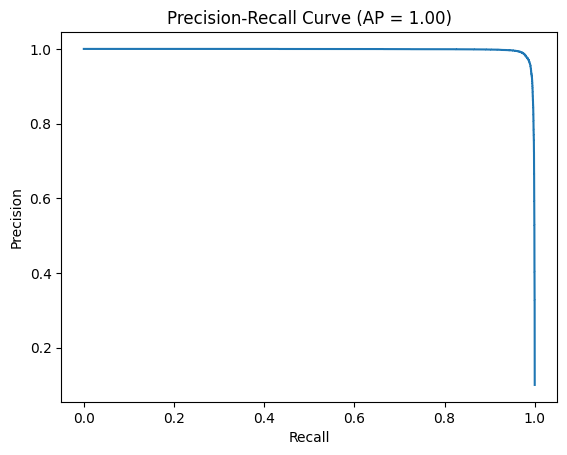

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_pred, average='weighted')

# Calculate precision and recall for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.show()


438/438 [==============================] - 4s 9ms/step


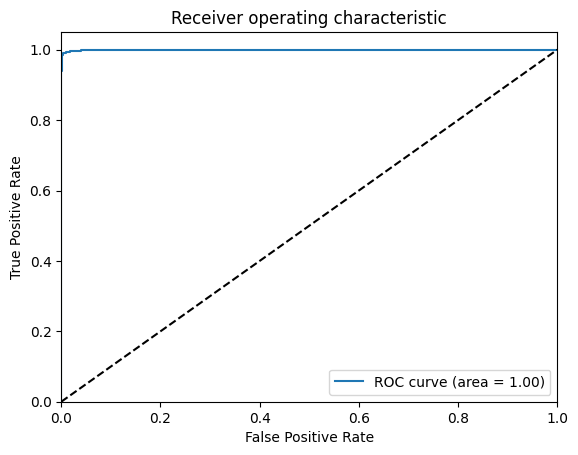

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
y_pred_proba = model.predict(X_test)

# Calculate false positive rate and true positive rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test[:,1], y_pred_proba[:,1])

# Calculate area under the ROC curve
roc_auc = roc_auc_score(y_test[:,1], y_pred_proba[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


New model with PCA

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, LSTM, TimeDistributed, Input, Reshape

# Apply PCA to reduce dimensionality to 50 features 
pca = PCA(n_components=50)
X = pca.fit_transform(X.reshape(X.shape[0], -1))
X = X.reshape(X.shape[0], 5, 10, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the model
inputs = Input(shape=(5, 10, 1))
conv1 = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), padding='same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)
dense1 = Dense(128, activation='relu')(flatten)
reshape = Reshape((1, 128))(dense1)
lstm = LSTM(32, return_sequences=False)(reshape)
output = Dense(10, activation='softmax')(lstm)

model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1750/1750 [==============================] - 17s 8ms/step - loss: 0.7021 - accuracy: 0.7826 - val_loss: 0.4700 - val_accuracy: 0.8537
Epoch 2/10
1750/1750 [==============================] - 15s 8ms/step - loss: 0.3602 - accuracy: 0.8886 - val_loss: 0.3397 - val_accuracy: 0.8939
Epoch 3/10
1750/1750 [==============================] - 14s 8ms/step - loss: 0.2884 - accuracy: 0.9111 - val_loss: 0.3047 - val_accuracy: 0.9060
Epoch 4/10
1750/1750 [==============================] - 14s 8ms/step - loss: 0.2518 - accuracy: 0.9225 - val_loss: 0.2738 - val_accuracy: 0.9165
Epoch 5/10
1750/1750 [==============================] - 14s 8ms/step - loss: 0.2214 - accuracy: 0.9314 - val_loss: 0.2543 - val_accuracy: 0.9247
Epoch 6/10
1750/1750 [==============================] - 15s 9ms/step - loss: 0.1998 - accuracy: 0.9367 - val_loss: 0.2590 - val_accuracy: 0.9219
Epoch 7/10
1750/1750 [==============================] - 14s 8ms/step - loss: 0.1813 - accuracy: 0.9430 - val_loss: 0.2591 - val_ac

In [34]:
# Load the data
X, y = fetch_openml(data_id=41982, as_frame=False, return_X_y=True)

# Convert data to float32 and normalize it between 0 and 1
X = X.astype('float32') / 255.


# Apply PCA to reduce the number of components to 200
pca = PCA(n_components=200)
X = pca.fit_transform(X)

# Reshape the data to a 4D tensor
X = X.reshape(X.shape[0], 10, 20, 1)

# Convert labels to one-hot encoded vectors
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the model
inputs = Input(shape=(10, 20, 1))
conv1 = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), padding='same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)
dense1 = Dense(128, activation='relu')(flatten)
reshape = Reshape((1, 128))(dense1)
lstm = LSTM(32, return_sequences=False)(reshape)
output = Dense(10, activation='softmax')(lstm)

model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
1750/1750 [==============================] - 34s 18ms/step - loss: 0.6703 - accuracy: 0.7893 - val_loss: 0.3741 - val_accuracy: 0.8846
Epoch 2/10
1750/1750 [==============================] - 32s 18ms/step - loss: 0.3222 - accuracy: 0.9007 - val_loss: 0.3184 - val_accuracy: 0.8999
Epoch 3/10
1750/1750 [==============================] - 31s 18ms/step - loss: 0.2423 - accuracy: 0.9258 - val_loss: 0.2904 - val_accuracy: 0.9095
Epoch 4/10
1750/1750 [==============================] - 31s 18ms/step - loss: 0.1935 - accuracy: 0.9401 - val_loss: 0.2554 - val_accuracy: 0.9221
Epoch 5/10
1750/1750 [==============================] - 29s 17ms/step - loss: 0.1604 - accuracy: 0.9503 - val_loss: 0.2537 - val_accuracy: 0.9234
Epoch 6/10
1750/1750 [==============================] - 30s 17ms/step - loss: 0.1331 - accuracy: 0.9582 - val_loss: 0.2576 - val_accuracy: 0.9261
Epoch 7/10
1750/1750 [==============================] - 31s 17ms/step - loss: 0.1141 - accuracy: 0.9638 - val_loss: 0.2446 -